In [80]:
import pandas as pd
import numpy as np
data = pd.read_csv('SS SB BS BB - Sheet1.csv')
length = len(data['Stop_id'])

In [81]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5] ## set the size of all figures

In [82]:
import math
def haversine(x,y): 
    lon1=x[0]
    lat1=x[1]
    lon2=y[0]
    lat2=y[1]
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 3956 
    return c*r

In [83]:
from itertools import combinations
x=data["Longitude"].tolist() # Longitude corresponds to the x axis.
y=data["Latitude"].tolist() # Latitude corresponds to the y axis.
z=data["Stop_id"].tolist() 
s=data['Nodesize'].tolist()

stations={}
pos={}
for i in range(len(x)):
    stations[z[i]]=(x[i],y[i]) # storing (x,y) information for each zip code
    pos[z[i]]=(x[i],y[i]) # also storing them to position the nodes in the end.

G=nx.Graph() 
addList=[]
for (i,j) in combinations(stations,2):
    distance=haversine(stations[i],stations[j])
    addList.append(distance)
    G.add_node(i,weight=distance)
    G.add_edge(i,j,weight=distance)

In [84]:
size=[10,10,10,450,10,40,10,10,20,10,150,20,10,30,110,30,50,30,10,20,10,10,10,20,40,160,30,40,10,50,10,30,10,960,10,320]

In [85]:
route=[[0, 144],[0, 74],[6, 52],[52, 97],[133, 138],[138, 6],[144, 70],[74, 133],[0, 25],[2, 41],[3, 5],[5, 62],[8, 2],[25, 3],[41, 24],[62, 98],[98, 118],[118, 8],[0, 27],[17, 47],[23, 90],[27, 23],[33, 115],[47, 33],[90, 105],[105, 17],[0, 116],[0, 147],[0, 148],[0, 149],[1, 84],[2, 0],[3, 114],[84, 88],[88, 2],[114, 137],[116, 3],[137, 1]]

In [86]:
starting=[]
for i in range(len(route)):
    if route[i][0]==0:
        starting.append(route[i])
#print(starting)

In [87]:
starting=[]
for i in range(len(route)):
    if route[i][0]==0:
        starting.append(route[i])
routes=[]
for i in range(len(starting)):
    routes.append([])
    routes[i].append(starting[i])
routes_n=0

while len(route)>routes_n:
    for i in range(len(route)):
        for j in range(len(routes)):
            if routes[j][-1][1]!=0:
                if route[i][0]==routes[j][-1][1]:
                    routes[j].append(route[i])
    routes_n=0
    for i in range(len(routes)):
        routes_n+=len(routes[i])

In [93]:
for r in range(len(routes)):
    dist=0
    for i in (range(len(routes[r]))):
        dist+= haversine(stations[routes[r][i][0]],stations[routes[r][i][1]])
    print("route ", r,": ",dist)

route  0 :  1.4991484906551988
route  1 :  52.701971561020436
route  2 :  62.02290344397185
route  3 :  38.96301671258826
route  4 :  82.34607095436145
route  5 :  0.6904522520889138
route  6 :  0.6904522520889138
route  7 :  0.6904522520889138


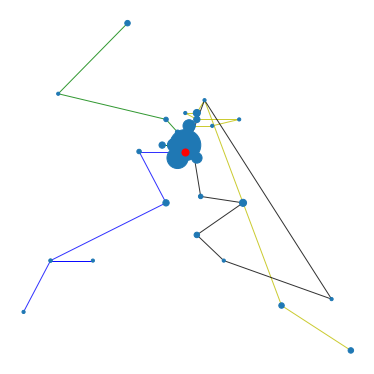

In [92]:
node_list=[0]
nx.draw(G,pos, with_labels=False,node_size=size,width=0) 
nx.draw_networkx_nodes(G,pos,node_size=50,nodelist=node_list,node_color ='r')
nx.draw_networkx_edges(G,pos,edge_color='r',edgelist=routes[0],alpha=0.8)
nx.draw_networkx_edges(G,pos,edge_color='b',edgelist=routes[1],alpha=0.8)
nx.draw_networkx_edges(G,pos,edge_color='y',edgelist=routes[2],alpha=0.8)
nx.draw_networkx_edges(G,pos,edge_color='g',edgelist=routes[3],alpha=0.8)
nx.draw_networkx_edges(G,pos,edge_color='k',edgelist=routes[4],alpha=0.8)
nx.draw_networkx_edges(G,pos,edge_color='c',edgelist=routes[5],alpha=0.8)
nx.draw_networkx_edges(G,pos,edge_color='m',edgelist=routes[6],alpha=0.8)
nx.draw_networkx_edges(G,pos,edge_color='lime',edgelist=routes[7],alpha=0.8)

plt.savefig("Whole-small(route=8,label)")
plt.show()